<a href="https://colab.research.google.com/github/Tripyromaniac/CS114.L22.KHCL/blob/main/Digits_reconization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
print(__doc__)


import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean

Automatically created module for IPython interactive environment


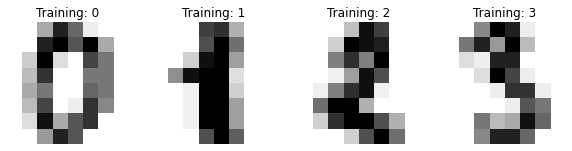

In [3]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

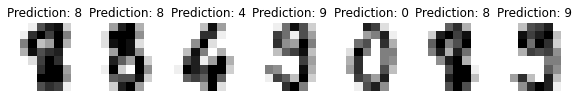

In [5]:
_, axes = plt.subplots(nrows=1, ncols=7, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [6]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


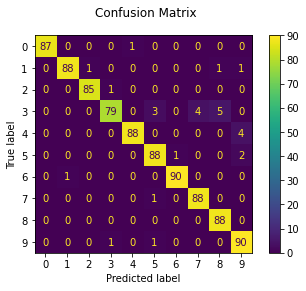

In [7]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [8]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import os
import cv2
import numpy as np


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


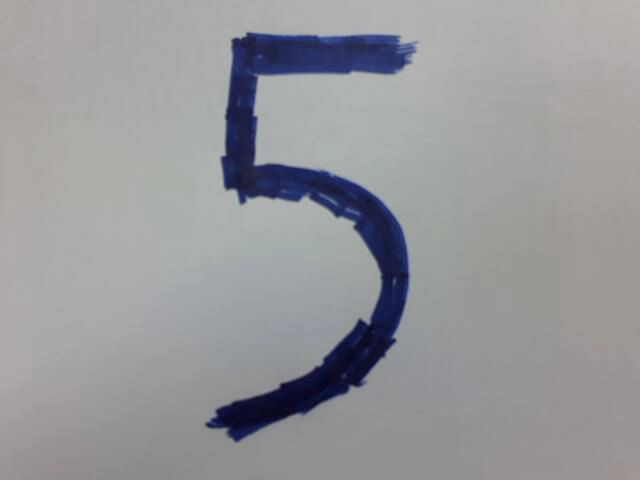

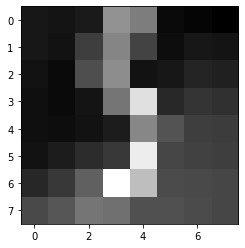

Dự đoán: [8]


In [36]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))

  img4 = cv2.imread(filename)
  img4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
  img4 = cv2.resize(img4, (8, 8), interpolation = cv2.INTER_AREA)
  img4 = 16-(img4/16)

  plt.imshow(img4 ,cmap='gray')
  plt.show()
  print("Dự đoán:", clf.predict(img4.reshape(1,64)))
except Exception as err:
  print(str(err))

In [9]:
from zipfile import ZipFile
file_name = 'Digits_Image.zip'
with ZipFile(file_name , 'r') as zip1:
  zip1.extractall()
  print('Done')

Done


In [34]:
import glob
from google.colab.patches import cv2_imshow

imgs = []
predicted = []

path = "/content/Digits_Image/*.*"
for file in glob.glob(path):
   a = cv2.imread(file) 

   b = cv2.resize(a, (8, 8), interpolation = cv2.INTER_AREA)
   b = cv2.cvtColor(b, cv2.COLOR_BGR2GRAY)
   b = 16-(b/16)
   b = cv2.normalize(b, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
   b = b.reshape(1,64)

   b = np.round(b)
   imgs.append(b)
   c = clf.predict(b)
   predicted.append(c[0])


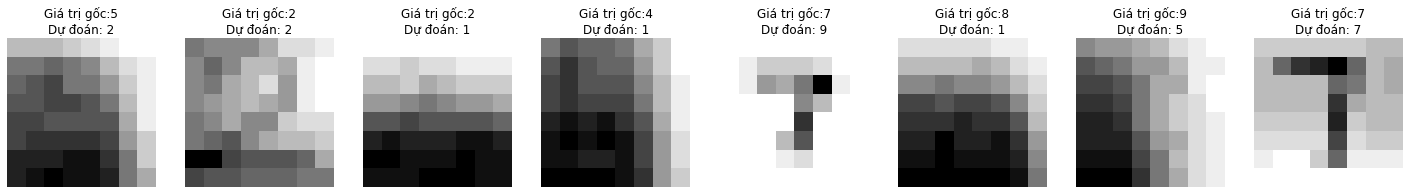

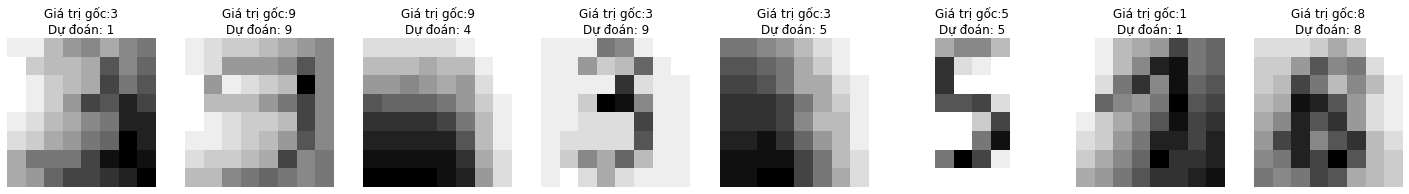

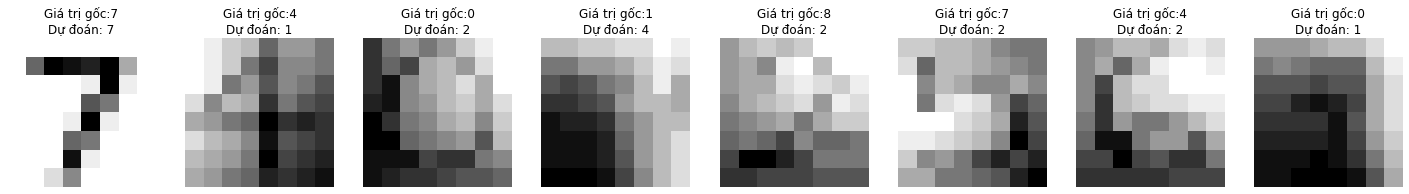

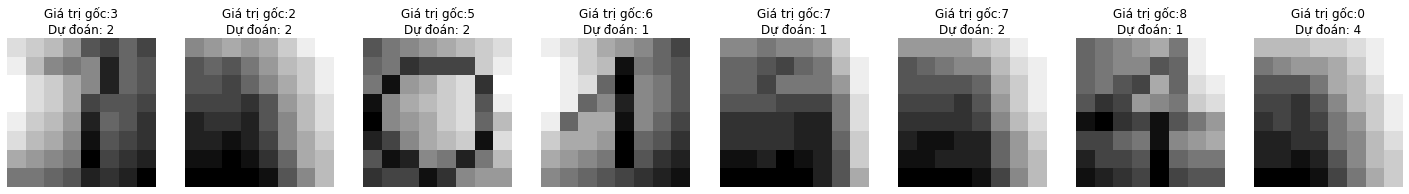

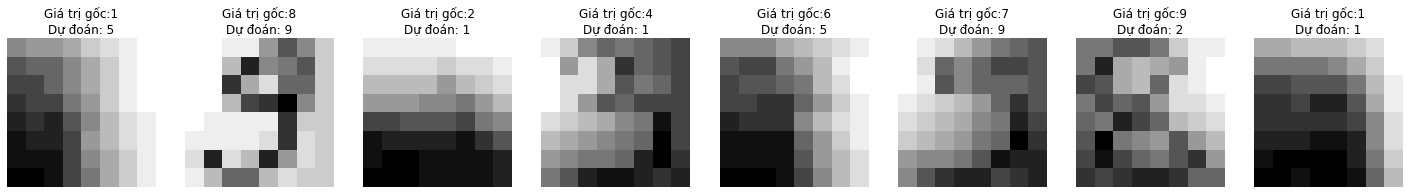

In [35]:
truth = [5, 2, 2, 4, 7, 8, 9, 7, 3, 9, 9, 3, 3, 5, 1, 8, 7, 4, 0, 1, 8, 7, 4, 0, 3, 2, 5, 6, 7, 7, 8, 0, 1, 8, 2, 4, 6, 7, 9, 1, 3, 7, 5, 8, 3]

for i in range(1,6):
  _, axes = plt.subplots(nrows=1, ncols=8, figsize=(25, 25))
  for ax, image, gt, prediction in zip(axes, imgs[(i-1)*8:(i-1)*8 + 8], truth[(i-1)*8:(i-1)*8 + 8], predicted[(i-1)*8:(i-1)*8 + 8]):
      ax.set_axis_off()
      image = image.reshape(8, 8)
      ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
      ax.set_title(f'Giá trị gốc:{gt}\nDự đoán: {int(prediction)}')
